In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
sns.set()

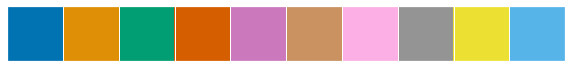

In [9]:
colors = sns.color_palette("colorblind")
# sns.palplot(sns.color_palette("Paired"))
sns.palplot(colors)
sns.set_style("whitegrid")
sns.set_style("ticks",{'axes.grid': True,'grid.color': '.95', 'grid.linestyle': '-'})

In [10]:
df_positives = pd.read_csv('../data/datasets/visits_sp_unique_train_positivo_1000_random_0.csv', index_col=0)

In [11]:
df_negatives = pd.read_csv('../data/datasets/visits_sp_unique_train_positivo_0_negative_1000.csv', index_col=0)

In [12]:
df_random = pd.read_csv('../data/datasets/visits_sp_unique_train_positivo_0_random_1000.csv', index_col=0)

In [13]:
df_shuffled = pd.read_csv('../data/datasets/visits_sp_unique_train_shuffled_snps_positivo_1000_random_0.csv', index_col=0)

In [14]:
df_positives_snps = df_positives[[c for c in df_positives.columns if 'snp' in c]]

In [15]:
positives_snps_occ = (df_positives_snps > 0).values.sum(axis=0)

In [16]:
df_negatives_snps = df_negatives[[c for c in df_negatives.columns if 'snp' in c]]

In [17]:
negatives_snps_occ = (df_negatives_snps > 0).values.sum(axis=0)

In [18]:
df_random_snps = df_random[[c for c in df_random.columns if 'snp' in c]]

In [19]:
random_snps_occ = (df_random_snps > 0).values.sum(axis=0)

In [20]:
df_shuffled_snps = df_shuffled[[c for c in df_shuffled.columns if 'snp' in c]]

In [21]:
shuffled_snps_occ = (df_shuffled_snps > 0).values.sum(axis=0)

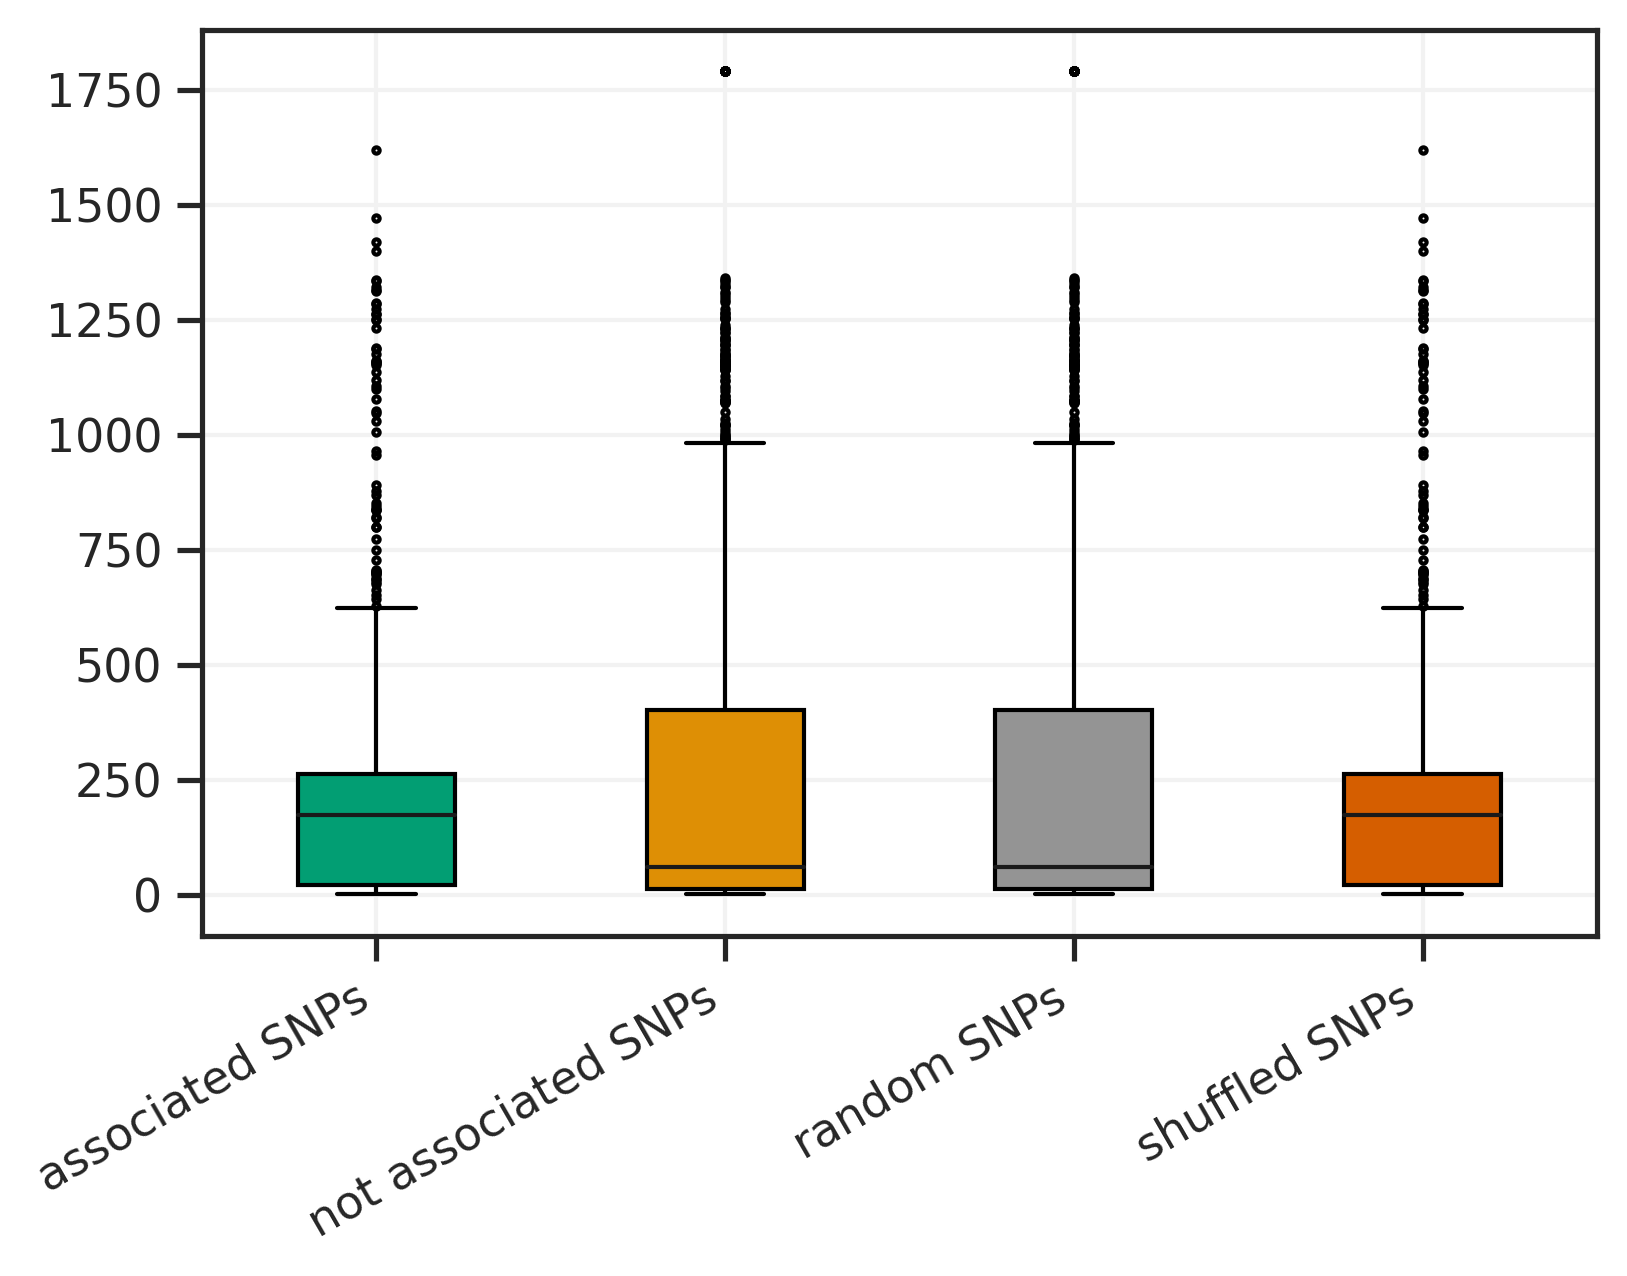

In [24]:
fig = plt.figure(dpi=300)
box = plt.boxplot([positives_snps_occ, negatives_snps_occ, random_snps_occ, shuffled_snps_occ], labels=['associated SNPs', 'not associated SNPs', 'random SNPs','shuffled SNPs'], patch_artist=True, medianprops=dict(color='k'), flierprops=dict(marker='.', markersize=3))
plt.xticks(rotation=30, ha='right')
c = [colors[2], colors[1], colors[7], colors[3]]
 
for patch, color in zip(box['boxes'], c):
    patch.set_facecolor(color)
fig.savefig("images/notebook-S02-plot1.png")

## IMPORTANT
Despite different SNP names (column names) the occurrence of recessive alleles in not associated SNPs and random SNPs sets are oddly equal!!!
The swarmplot bellow are disturbing. (Falar com o Marcio sobre esses conjuntos)
  

/home/ABTLUS/jose.pereira/projects/diabnet/.venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 10.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/ABTLUS/jose.pereira/projects/diabnet/.venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/ABTLUS/jose.pereira/projects/diabnet/.venv/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


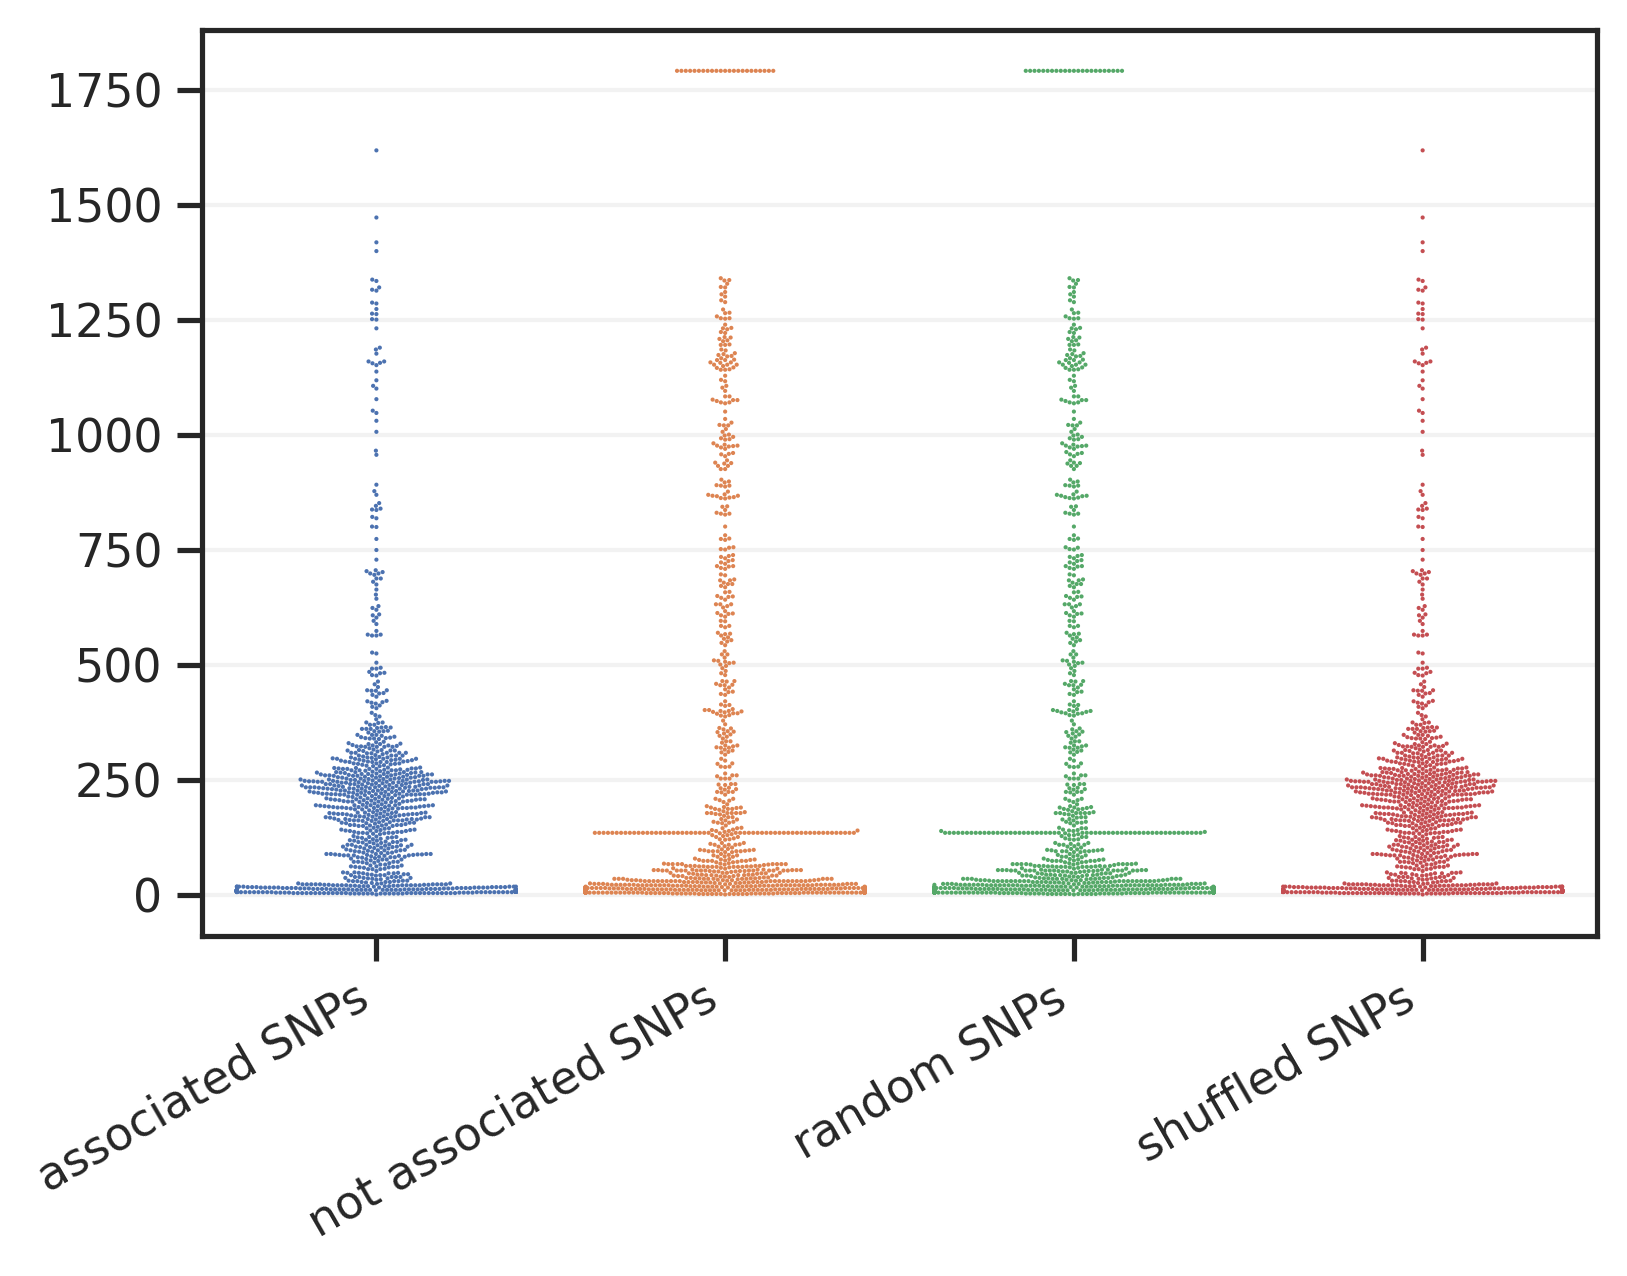

In [25]:
# plt.figure(dpi=300)
fig = plt.figure(dpi=300)
swp = sns.swarmplot(data=[positives_snps_occ, negatives_snps_occ, random_snps_occ, shuffled_snps_occ], size=1);
swp.set_xticklabels(['associated SNPs', 'not associated SNPs', 'random SNPs','shuffled SNPs'])
plt.xticks(rotation=30, ha='right')
fig.savefig("images/notebook-S02-plot2.png")